/home/ubuntu/workspace/envs/mambav/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/ubuntu/workspace/envs/mambav/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


image <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=640x457 at 0x7F0EAEFEC550>
input_tensor shape =  torch.Size([3, 224, 224])
input_tensor shape =  torch.Size([1, 3, 224, 224])
shape of the output of model =  torch.Size([1, 1000])
target_class shape =  torch.Size([1])
target_class =  tensor([294])
output[0, target_class] = tensor([18.6809], grad_fn=<IndexBackward0>)
saliency shape 1 =  torch.Size([1, 224, 224])
saliency shape 2 =  torch.Size([224, 224])


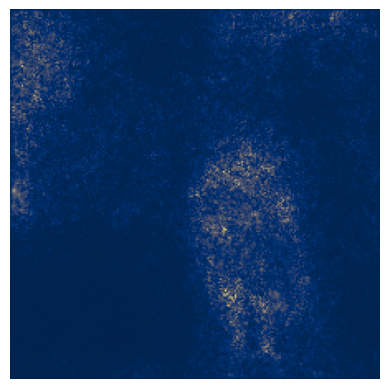

In [6]:
import torch
import torch.nn.functional as F
from torchvision import models, transforms
from PIL import Image
import matplotlib.pyplot as plt

# Load pre-trained VGG16 model
model = models.vgg16(pretrained=True)
model.eval()

# Load and preprocess the image
image_path = '/home/ubuntu/workspace/mambavision_1/test/000000020247.jpg' 
image = Image.open(image_path)
print('image', image)
preprocess = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
input_tensor = preprocess(image)
print('input_tensor shape = ', input_tensor.shape)
input_tensor = input_tensor.unsqueeze(0)  # Create a mini-batch as expected by the model
print('input_tensor shape = ', input_tensor.shape)
# Set requires_grad attribute of tensor. Important for saliency calculation
input_tensor.requires_grad_()

# Forward pass
output = model(input_tensor)
print('shape of the output of model = ', output.shape)
# Get the index of the class with the highest score
target_class = output.argmax(dim=1)
print('target_class shape = ', target_class.shape)
print('target_class = ', target_class)
print('output[0, target_class] =', output[0, target_class])
# Backward pass: Compute gradients of the target class with respect to input image
model.zero_grad()
output[0, target_class].backward()

# Get the saliency map
saliency, _ = torch.max(input_tensor.grad.data.abs(), dim=1)
print('saliency shape 1 = ', saliency.shape)
saliency = saliency.squeeze()
print('saliency shape 2 = ', saliency.shape)
# Convert to numpy for visualization
saliency = saliency.numpy()

# Plot the saliency map
plt.imshow(saliency, cmap='cividis')
plt.axis('off')
# plt.show()
plt.savefig('/home/ubuntu/workspace/mambavision_1/test/000000020247_salient.jpg')


In [16]:
# input_tensor.grad # [1,3,224, 224]
res = torch.max(input_tensor.grad.data.abs(), dim = 1)
print(res)

torch.return_types.max(
values=tensor([[[0.0130, 0.0145, 0.0061,  ..., 0.0129, 0.0087, 0.0105],
         [0.0298, 0.0064, 0.0477,  ..., 0.0118, 0.0143, 0.0184],
         [0.0207, 0.0553, 0.0916,  ..., 0.0096, 0.0139, 0.0188],
         ...,
         [0.0018, 0.0058, 0.0054,  ..., 0.0131, 0.0054, 0.0046],
         [0.0034, 0.0052, 0.0073,  ..., 0.0102, 0.0110, 0.0060],
         [0.0007, 0.0024, 0.0023,  ..., 0.0059, 0.0050, 0.0050]]]),
indices=tensor([[[1, 1, 1,  ..., 1, 2, 0],
         [1, 0, 1,  ..., 2, 0, 0],
         [0, 0, 1,  ..., 2, 1, 0],
         ...,
         [2, 2, 2,  ..., 1, 1, 1],
         [0, 0, 2,  ..., 1, 0, 0],
         [2, 0, 2,  ..., 1, 1, 0]]]))


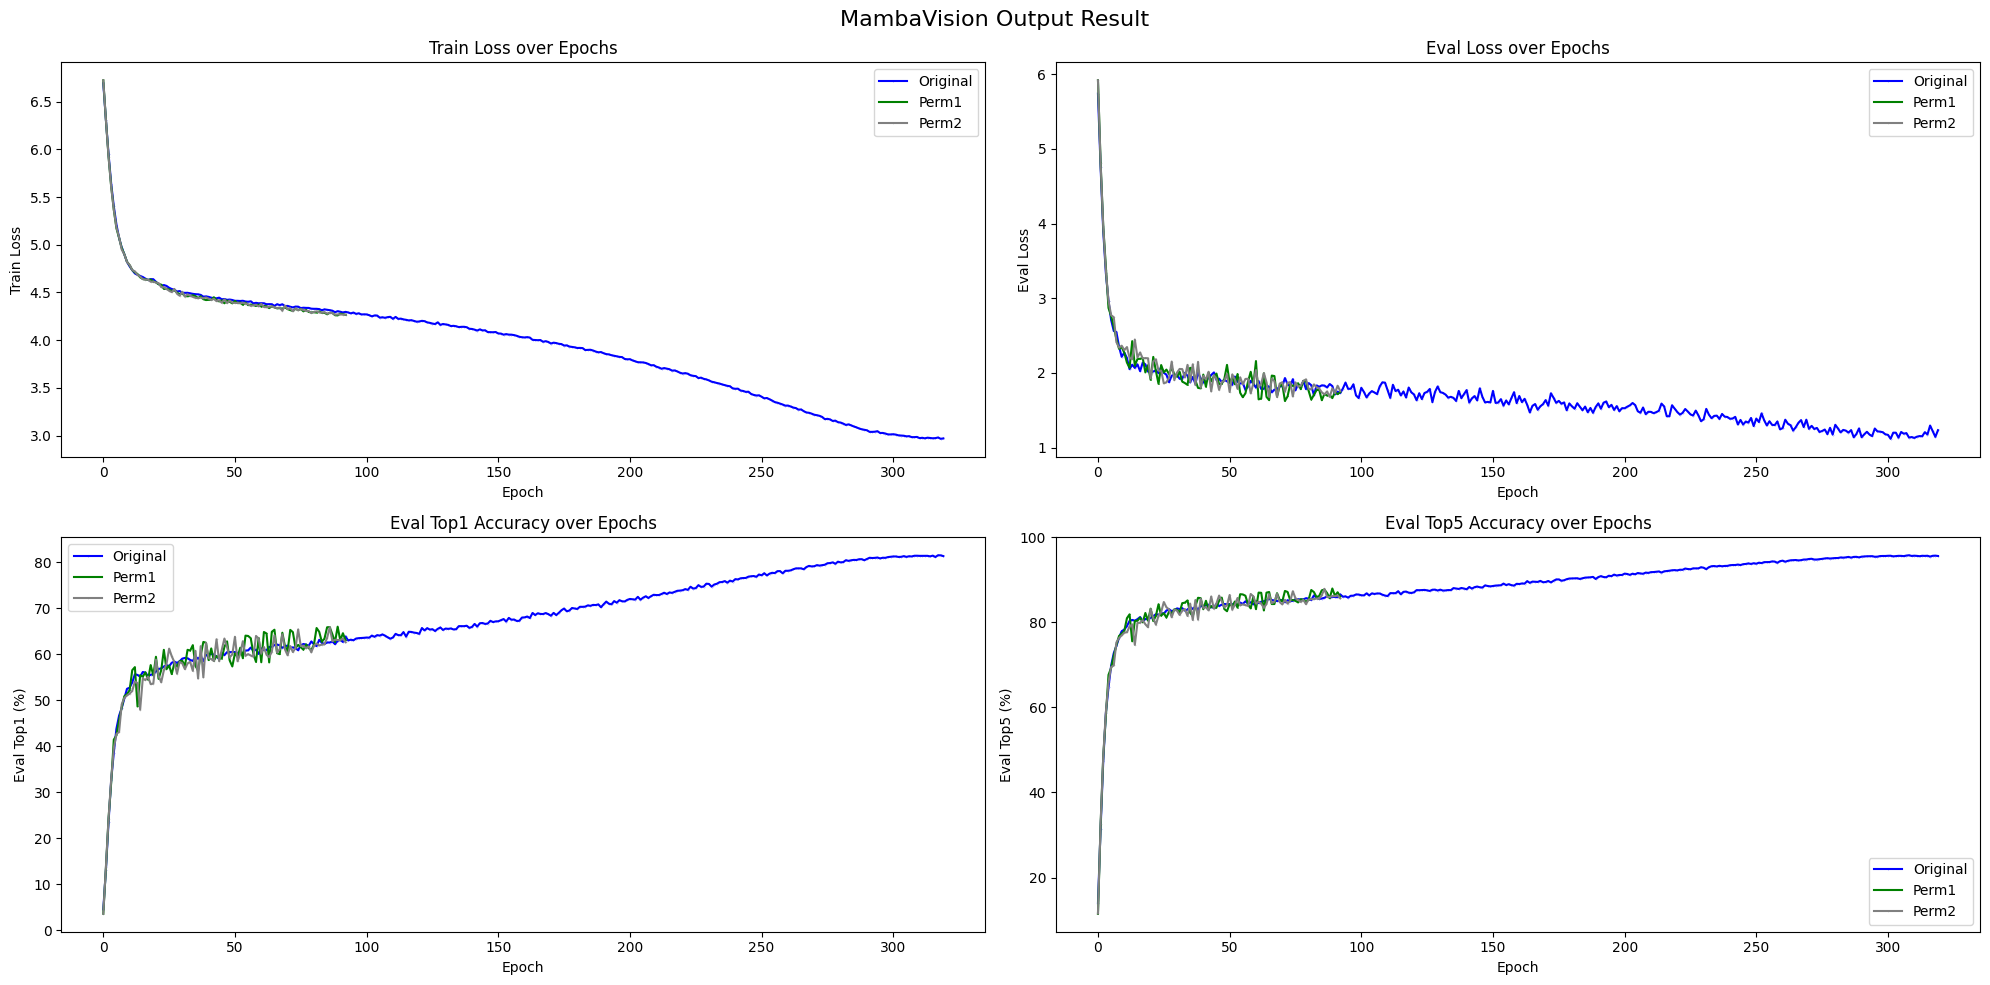

In [8]:
import matplotlib.pyplot as plt
import pandas as pd

# Read data from the three text files
df_baseline = pd.read_csv('./summary/original.txt')
df_perm1 = pd.read_csv('./summary/perm1.txt')
df_perm2 = pd.read_csv('./summary/perm2.txt')
df_attn = pd.read_csv('./summary/attn.txt')
# Plotting
plt.figure(figsize=(20, 10))
# Add a suptitle for the entire figure
plt.suptitle('MambaVision Output Result', fontsize=16)

# Train Loss Comparison
plt.subplot(2, 2, 1)
plt.plot(df_baseline['epoch'], df_baseline['train_loss'], marker='o', label='Baseline', color='blue', markersize = 0.1)
plt.plot(df_perm1['epoch'], df_perm1['train_loss'], marker='x', label='Perm1', color='green', markersize = 0.1)
plt.plot(df_perm2['epoch'], df_perm2['train_loss'], marker='s', label='Perm2', color='grey', markersize = 0.1)
# plt.plot(df_attn['epoch'], df_attn['train_loss'], marker='.', label ='attn',color='red', markersize =0.1)
plt.title('Train Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Train Loss')
plt.legend()

# Eval Loss Comparison
plt.subplot(2, 2, 2)
plt.plot(df_baseline['epoch'], df_baseline['eval_loss'], marker='o', label='Baseline', color='blue', markersize = 0.1)
plt.plot(df_perm1['epoch'], df_perm1['eval_loss'], marker='x', label='Perm1', color='green', markersize = 0.1)
plt.plot(df_perm2['epoch'], df_perm2['eval_loss'], marker='s', label='Perm2', color='grey', markersize = 0.1)
# plt.plot(df_attn['epoch'], df_attn['eval_loss'], marker='.', label ='attn',color='red', markersize =0.1)
plt.title('Eval Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Eval Loss')
plt.legend()

# Eval Top1 Accuracy Comparison
plt.subplot(2, 2, 3)
plt.plot(df_baseline['epoch'], df_baseline['eval_top1'], marker='o', label='Baseline', color='blue', markersize = 0.1)
plt.plot(df_perm1['epoch'], df_perm1['eval_top1'], marker='x', label='Perm1', color='green', markersize = 0.1)
plt.plot(df_perm2['epoch'], df_perm2['eval_top1'], marker='s', label='Perm2', color='grey', markersize = 0.1)
# plt.plot(df_attn['epoch'], df_attn['eval_top1'], marker='.', label ='attn',color='red', markersize =0.1)
plt.title('Eval Top1 Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Eval Top1 (%)')
plt.legend()

# Eval Top5 Accuracy Comparison
plt.subplot(2, 2, 4)
plt.plot(df_baseline['epoch'], df_baseline['eval_top5'], marker='o', label='Baseline', color='blue', markersize = 0.1)
plt.plot(df_perm1['epoch'], df_perm1['eval_top5'], marker='x', label='Perm1', color='green', markersize = 0.1)
plt.plot(df_perm2['epoch'], df_perm2['eval_top5'], marker='s', label='Perm2', color='grey', markersize = 0.1)
# plt.plot(df_attn['epoch'], df_attn['eval_top5'], marker='.', label ='attn',color='red', markersize =0.1)
plt.title('Eval Top5 Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Eval Top5 (%)')
plt.legend()

plt.tight_layout()

# plt.show()
plt.savefig('./output_visualize.png')

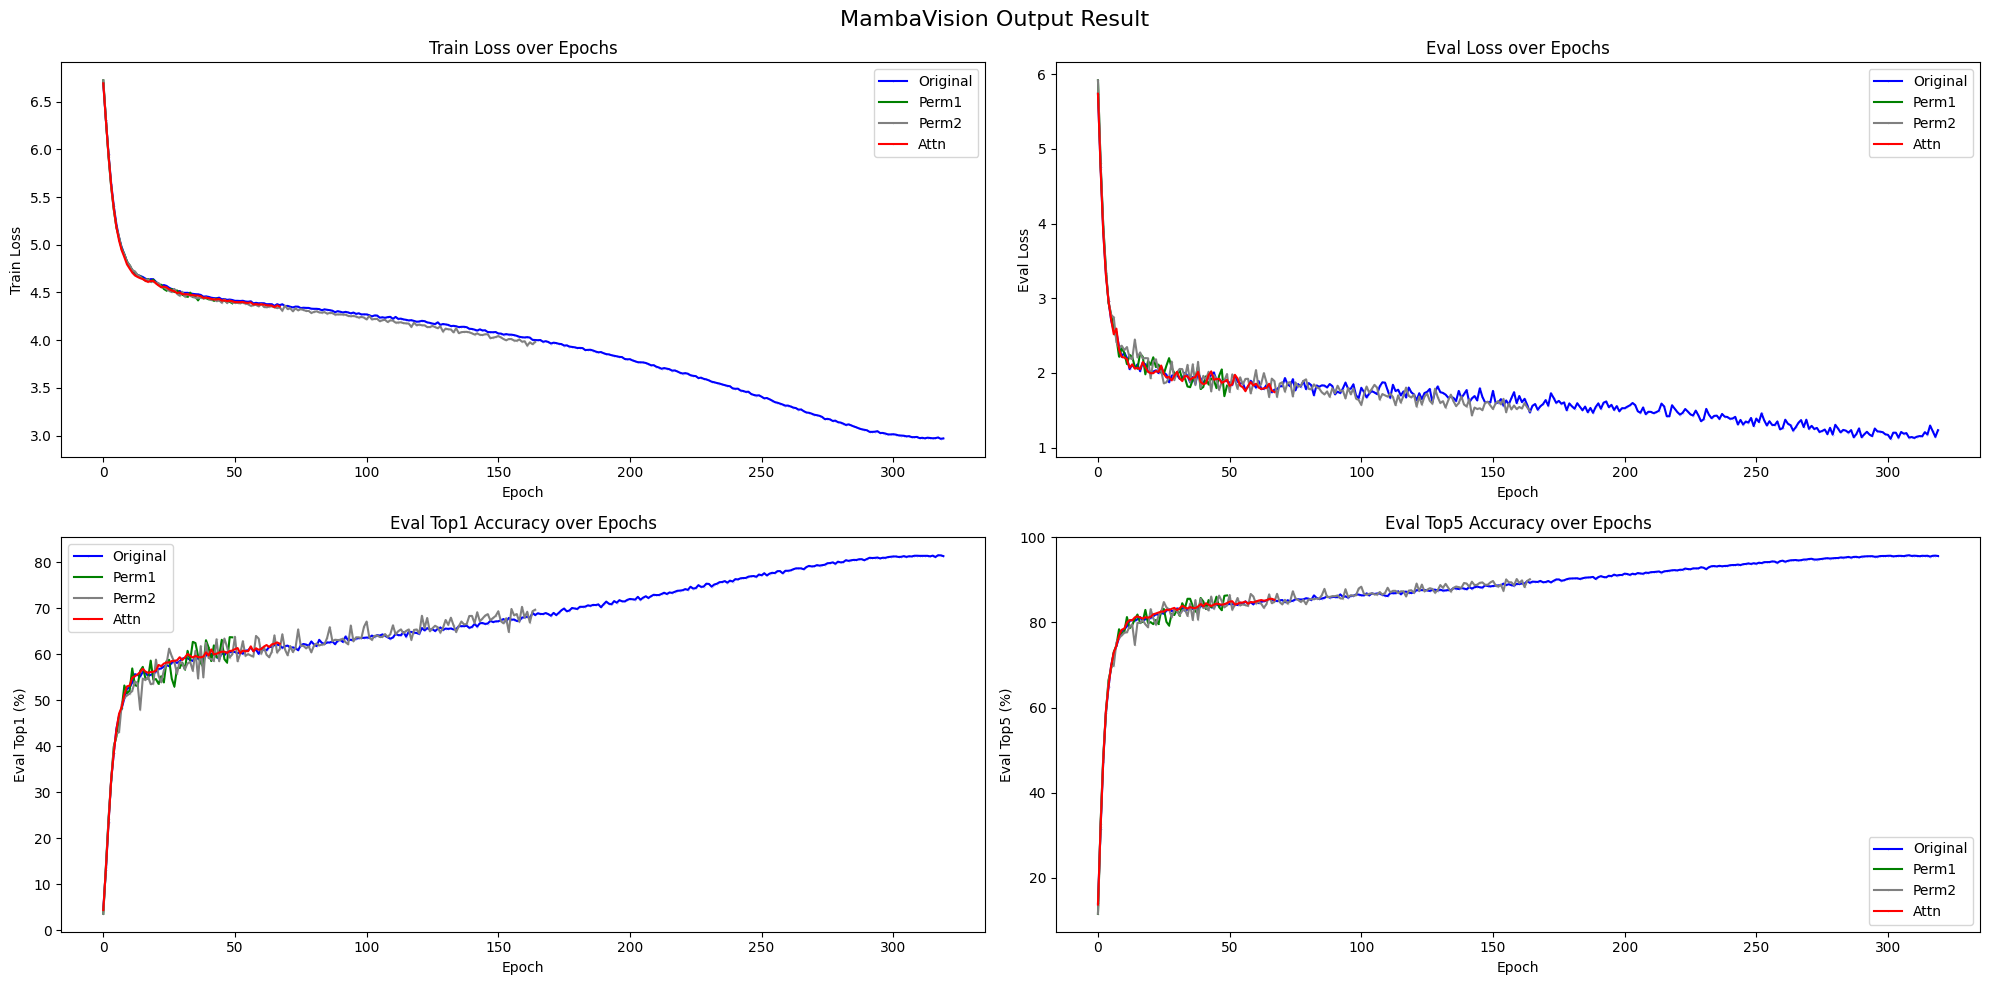

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

# Read data from the text files
df_baseline = pd.read_csv('./summary/original.txt')
df_perm1 = pd.read_csv('./summary/perm1.txt')
df_perm2 = pd.read_csv('./summary/perm2.txt')
df_attn = pd.read_csv('./summary/attn.txt')
df_attn1 = pd.read_csv('./summary/attn1.txt')
df_attn2 = pd.read_csv('./summary/attn2.txt')

# Plotting
plt.figure(figsize=(20, 10))

# Add a suptitle for the entire figure
plt.suptitle('MambaVision Output Result', fontsize=16)

# Train Loss Comparison
plt.subplot(2, 2, 1)
plt.plot(df_baseline['epoch'], df_baseline['train_loss'], marker='o', label='Baseline', color='blue', markersize=0.1)
plt.plot(df_perm1['epoch'], df_perm1['train_loss'], marker='x', label='Perm1', color='green', markersize=0.1)
plt.plot(df_perm2['epoch'], df_perm2['train_loss'], marker='s', label='Perm2', color='grey', markersize=0.1)
plt.plot(df_attn['epoch'], df_attn['train_loss'], marker='.', label='Attn', color='red', markersize=0.1)
# plt.plot(df_attn1['epoch'], df_attn1['train_loss'], marker='^', label='Attn1', color='orange', markersize=0.1)
# plt.plot(df_attn2['epoch'], df_attn2['train_loss'], marker='v', label='Attn2', color='purple', markersize=0.1)
plt.title('Train Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Train Loss')
plt.legend()

# Eval Loss Comparison
plt.subplot(2, 2, 2)
plt.plot(df_baseline['epoch'], df_baseline['eval_loss'], marker='o', label='Baseline', color='blue', markersize=0.1)
plt.plot(df_perm1['epoch'], df_perm1['eval_loss'], marker='x', label='Perm1', color='green', markersize=0.1)
plt.plot(df_perm2['epoch'], df_perm2['eval_loss'], marker='s', label='Perm2', color='grey', markersize=0.1)
plt.plot(df_attn['epoch'], df_attn['eval_loss'], marker='.', label='Attn', color='red', markersize=0.1)
# plt.plot(df_attn1['epoch'], df_attn1['eval_loss'], marker='^', label='Attn1', color='orange', markersize=0.1)
# plt.plot(df_attn2['epoch'], df_attn2['eval_loss'], marker='v', label='Attn2', color='purple', markersize=0.1)
plt.title('Eval Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Eval Loss')
plt.legend()

# Eval Top1 Accuracy Comparison
plt.subplot(2, 2, 3)
plt.plot(df_baseline['epoch'], df_baseline['eval_top1'], marker='o', label='Baseline', color='blue', markersize=0.1)
plt.plot(df_perm1['epoch'], df_perm1['eval_top1'], marker='x', label='Perm1', color='green', markersize=0.1)
plt.plot(df_perm2['epoch'], df_perm2['eval_top1'], marker='s', label='Perm2', color='grey', markersize=0.1)
plt.plot(df_attn['epoch'], df_attn['eval_top1'], marker='.', label='Attn', color='red', markersize=0.1)
# plt.plot(df_attn1['epoch'], df_attn1['eval_top1'], marker='^', label='Attn1', color='orange', markersize=0.1)
# plt.plot(df_attn2['epoch'], df_attn2['eval_top1'], marker='v', label='Attn2', color='purple', markersize=0.1)
plt.title('Eval Top1 Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Eval Top1 (%)')
plt.legend()

# Eval Top5 Accuracy Comparison
plt.subplot(2, 2, 4)
plt.plot(df_baseline['epoch'], df_baseline['eval_top5'], marker='o', label='Baseline', color='blue', markersize=0.1)
plt.plot(df_perm1['epoch'], df_perm1['eval_top5'], marker='x', label='Perm1', color='green', markersize=0.1)
plt.plot(df_perm2['epoch'], df_perm2['eval_top5'], marker='s', label='Perm2', color='grey', markersize=0.1)
plt.plot(df_attn['epoch'], df_attn['eval_top5'], marker='.', label='Attn', color='red', markersize=0.1)
# plt.plot(df_attn1['epoch'], df_attn1['eval_top5'], marker='^', label='Attn1', color='orange', markersize=0.1)
# plt.plot(df_attn2['epoch'], df_attn2['eval_top5'], marker='v', label='Attn2', color='purple', markersize=0.1)
plt.title('Eval Top5 Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Eval Top5 (%)')
plt.legend()

plt.tight_layout()

# plt.show()
plt.savefig('./output_attn.png')


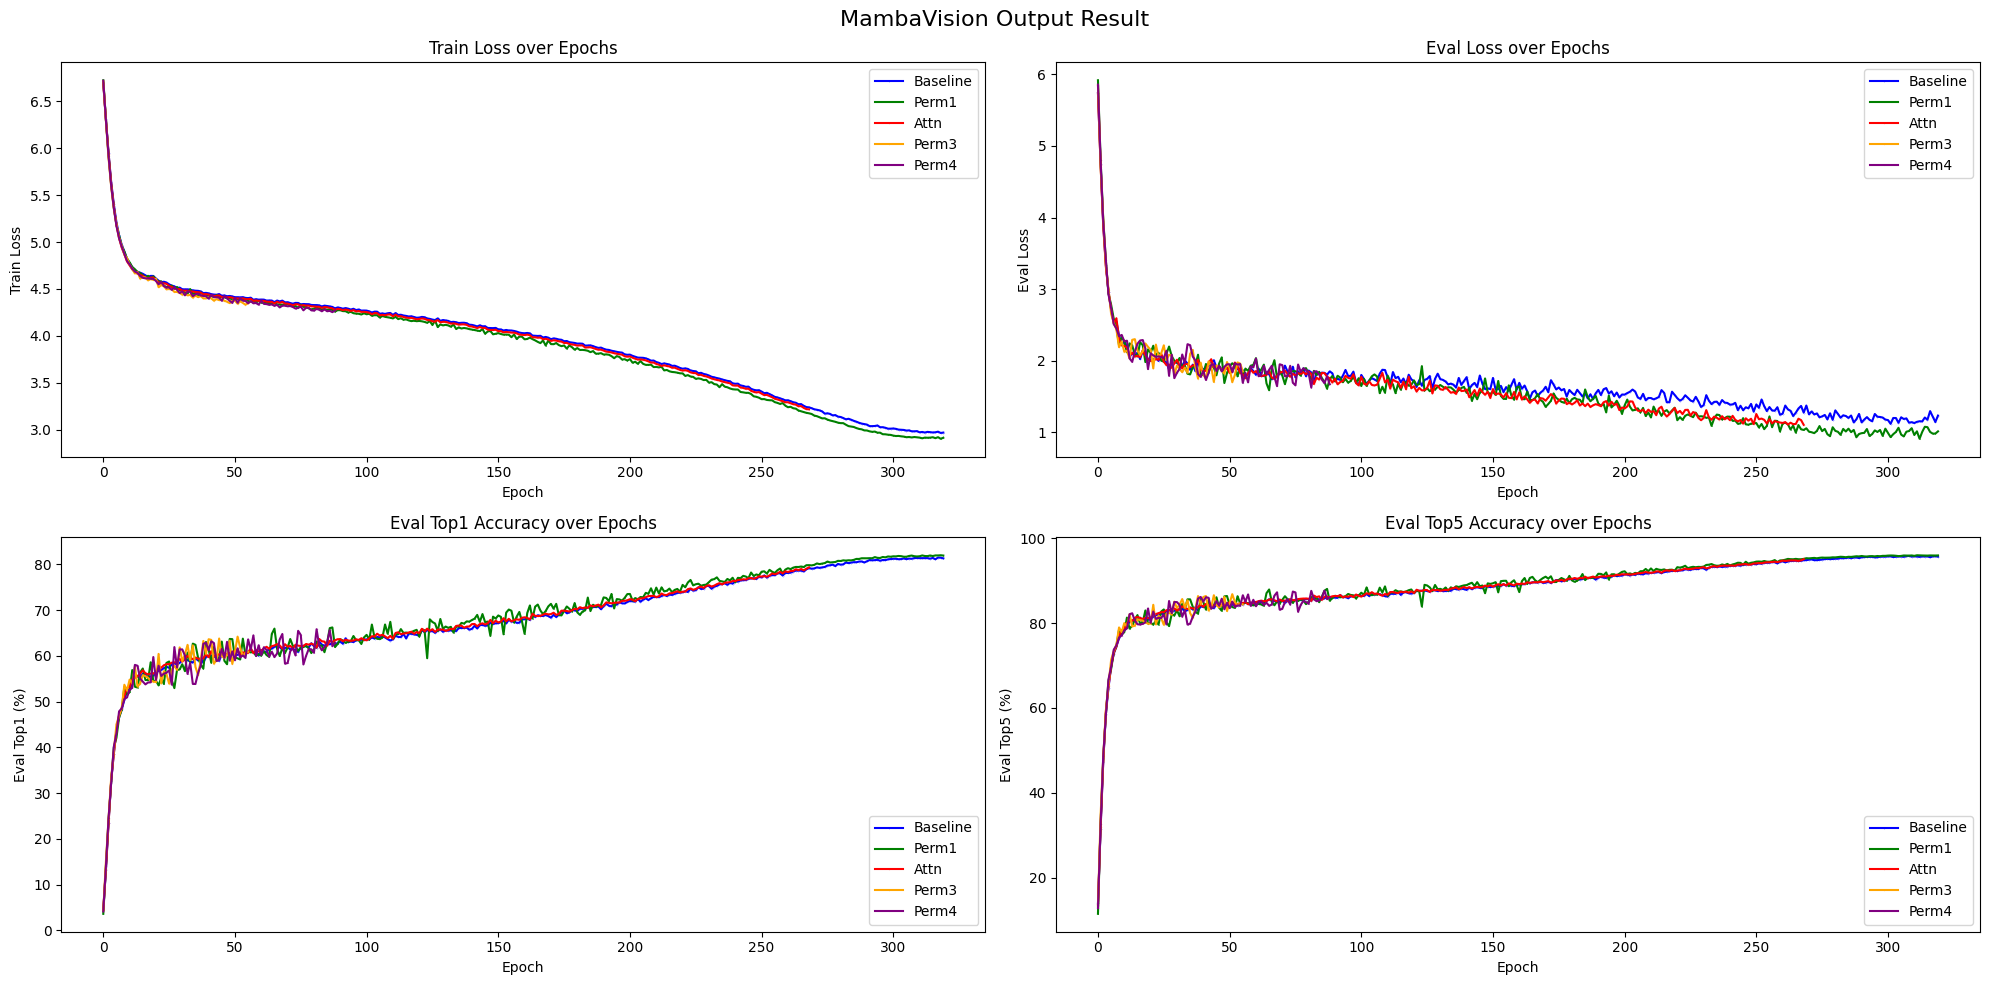

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

# Read data from the text files
df_baseline = pd.read_csv('./summary/original.txt')
df_perm1 = pd.read_csv('./summary/perm1.txt')
df_perm2 = pd.read_csv('./summary/perm2.txt')
df_attn = pd.read_csv('./summary/attn.txt')
df_perm3 = pd.read_csv('./summary/perm3.txt')
df_perm4 = pd.read_csv('./summary/perm4.txt')


# Plotting
plt.figure(figsize=(20, 10))

# Add a suptitle for the entire figure
plt.suptitle('MambaVision Output Result', fontsize=16)

# Train Loss Comparison
plt.subplot(2, 2, 1)
plt.plot(df_baseline['epoch'], df_baseline['train_loss'], marker='o', label='Baseline', color='blue', markersize=0.1)
plt.plot(df_perm1['epoch'], df_perm1['train_loss'], marker='x', label='Perm1', color='green', markersize=0.1)
# plt.plot(df_perm2['epoch'], df_perm2['train_loss'], marker='s', label='Perm2', color='grey', markersize=0.1)
plt.plot(df_attn['epoch'], df_attn['train_loss'], marker='.', label='Attn', color='red', markersize=0.1)
plt.plot(df_perm3['epoch'], df_perm3['train_loss'], marker='^', label='Perm3', color='orange', markersize=0.1)
plt.plot(df_perm4['epoch'], df_perm4['train_loss'], marker='v', label='Perm4', color='purple', markersize=0.1)
plt.title('Train Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Train Loss')
plt.legend()

# Eval Loss Comparison
plt.subplot(2, 2, 2)
plt.plot(df_baseline['epoch'], df_baseline['eval_loss'], marker='o', label='Baseline', color='blue', markersize=0.1)
plt.plot(df_perm1['epoch'], df_perm1['eval_loss'], marker='x', label='Perm1', color='green', markersize=0.1)
# plt.plot(df_perm2['epoch'], df_perm2['eval_loss'], marker='s', label='Perm2', color='grey', markersize=0.1)
plt.plot(df_attn['epoch'], df_attn['eval_loss'], marker='.', label='Attn', color='red', markersize=0.1)
plt.plot(df_perm3['epoch'], df_perm3['eval_loss'], marker='^', label='Perm3', color='orange', markersize=0.1)
plt.plot(df_perm4['epoch'], df_perm4['eval_loss'], marker='v', label='Perm4', color='purple', markersize=0.1)
plt.title('Eval Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Eval Loss')
plt.legend()

# Eval Top1 Accuracy Comparison
plt.subplot(2, 2, 3)
plt.plot(df_baseline['epoch'], df_baseline['eval_top1'], marker='o', label='Baseline', color='blue', markersize=0.1)
plt.plot(df_perm1['epoch'], df_perm1['eval_top1'], marker='x', label='Perm1', color='green', markersize=0.1)
# plt.plot(df_perm2['epoch'], df_perm2['eval_top1'], marker='s', label='Perm2', color='grey', markersize=0.1)
plt.plot(df_attn['epoch'], df_attn['eval_top1'], marker='.', label='Attn', color='red', markersize=0.1)
plt.plot(df_perm3['epoch'], df_perm3['eval_top1'], marker='^', label='Perm3', color='orange', markersize=0.1)
plt.plot(df_perm4['epoch'], df_perm4['eval_top1'], marker='v', label='Perm4', color='purple', markersize=0.1)
plt.title('Eval Top1 Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Eval Top1 (%)')
plt.legend()

# Eval Top5 Accuracy Comparison
plt.subplot(2, 2, 4)
plt.plot(df_baseline['epoch'], df_baseline['eval_top5'], marker='o', label='Baseline', color='blue', markersize=0.1)
plt.plot(df_perm1['epoch'], df_perm1['eval_top5'], marker='x', label='Perm1', color='green', markersize=0.1)
# plt.plot(df_perm2['epoch'], df_perm2['eval_top5'], marker='s', label='Perm2', color='grey', markersize=0.1)
plt.plot(df_attn['epoch'], df_attn['eval_top5'], marker='.', label='Attn', color='red', markersize=0.1)
plt.plot(df_perm3['epoch'], df_perm3['eval_top5'], marker='^', label='Perm3', color='orange', markersize=0.1)
plt.plot(df_perm4['epoch'], df_perm4['eval_top5'], marker='v', label='Perm4', color='purple', markersize=0.1)
plt.title('Eval Top5 Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Eval Top5 (%)')
plt.legend()

plt.tight_layout()

# plt.show()
plt.savefig('./comparision.png')


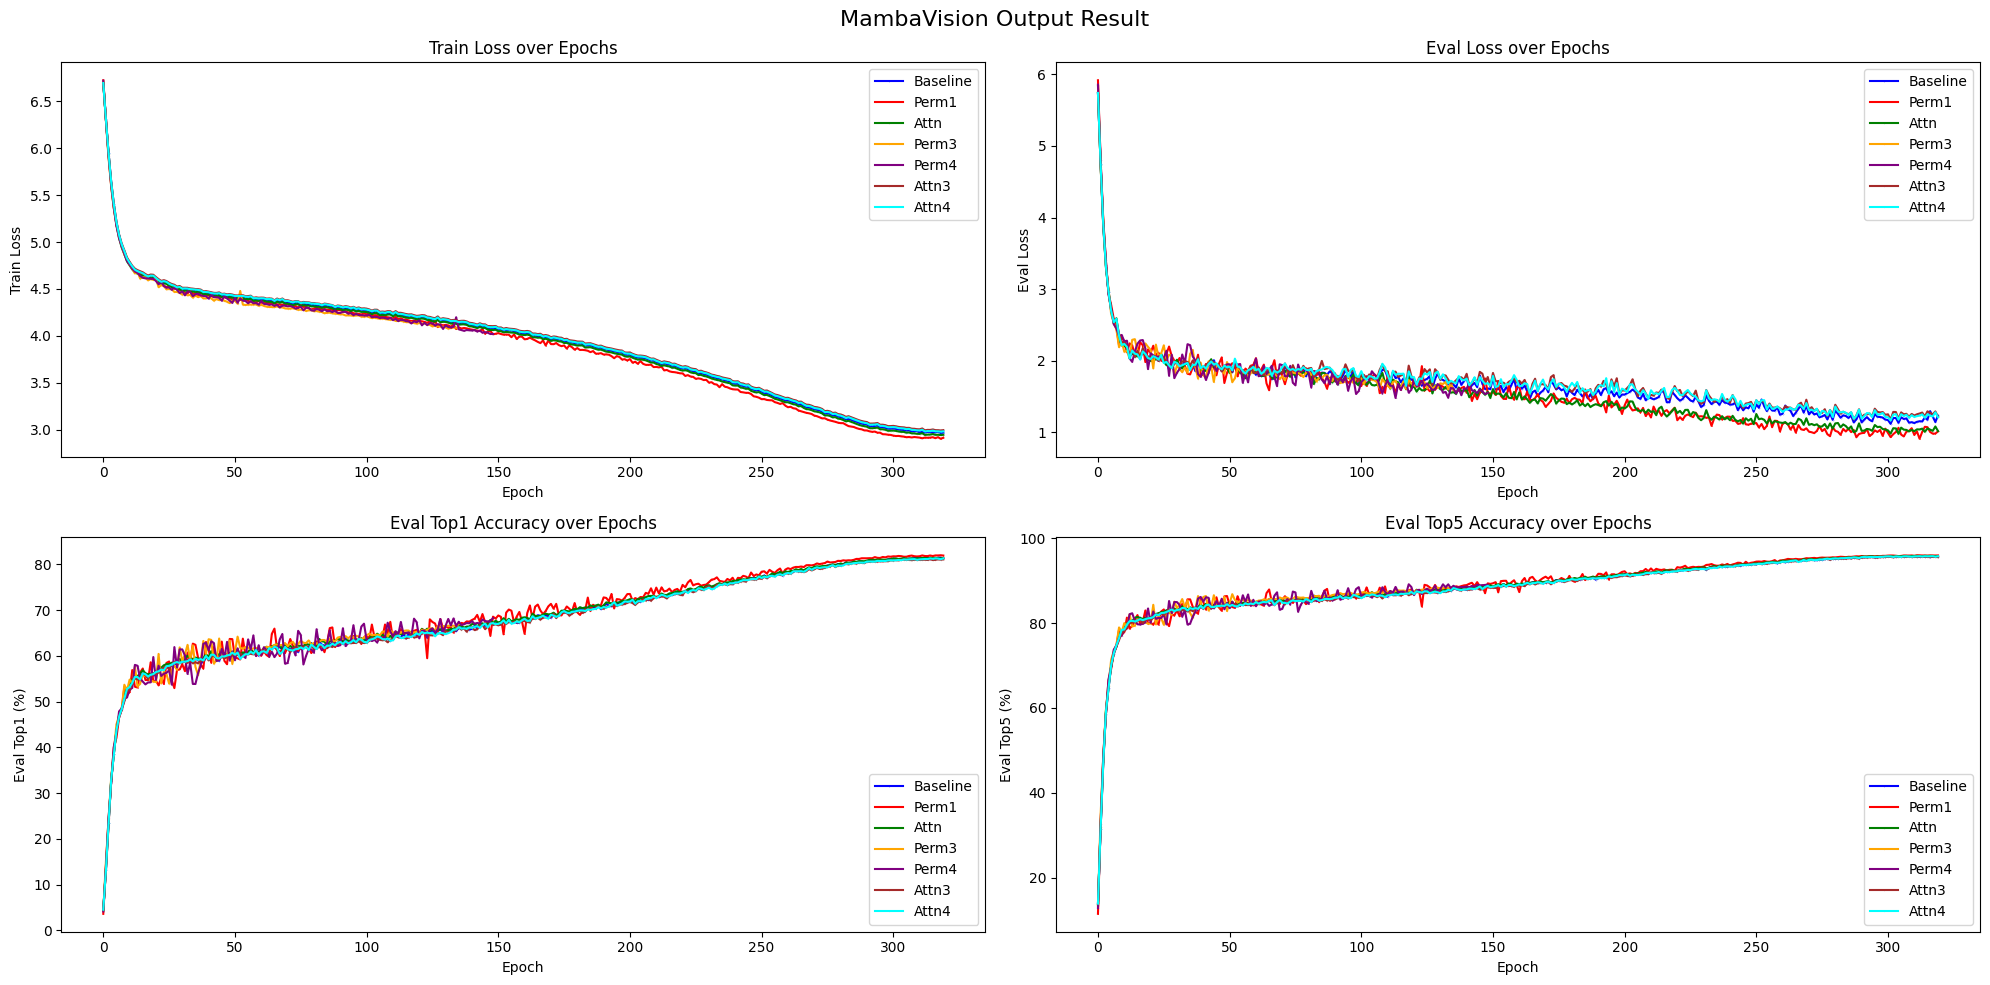

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

# Read data from the text files
df_baseline = pd.read_csv('./summary/original.txt')
df_perm1 = pd.read_csv('./summary/perm1.txt')
df_perm2 = pd.read_csv('./summary/perm2.txt')
df_attn = pd.read_csv('./summary/attn.txt')
# df_attn1 = pd.read_csv('./summary/attn1.txt')
# df_attn2 = pd.read_csv('./summary/attn2.txt')
df_perm3 = pd.read_csv('./summary/perm3.txt')
df_perm4 = pd.read_csv('./summary/perm4.txt')
df_attn3 = pd.read_csv('./summary/attn3.txt')
df_attn4 = pd.read_csv('./summary/attn4.txt')

# Plotting
plt.figure(figsize=(20, 10))

# Add a suptitle for the entire figure
plt.suptitle('MambaVision Output Result', fontsize=16)

# Train Loss Comparison
plt.subplot(2, 2, 1)
plt.plot(df_baseline['epoch'], df_baseline['train_loss'], marker='o', label='Baseline', color='blue', markersize=0.1)
plt.plot(df_perm1['epoch'], df_perm1['train_loss'], marker='x', label='Perm1', color='red', markersize=0.1)
# plt.plot(df_perm2['epoch'], df_perm2['train_loss'], marker='s', label='Perm2', color='grey', markersize=0.1)
plt.plot(df_attn['epoch'], df_attn['train_loss'], marker='.', label='Attn', color='green', markersize=0.1)
# plt.plot(df_attn1['epoch'], df_attn1['train_loss'], marker='^', label='Attn1', color='orange', markersize=0.1)
# plt.plot(df_attn2['epoch'], df_attn2['train_loss'], marker='v', label='Attn2', color='purple', markersize=0.1)
plt.plot(df_perm3['epoch'], df_perm3['train_loss'], marker='^', label='Perm3', color='orange', markersize=0.1)
plt.plot(df_perm4['epoch'], df_perm4['train_loss'], marker='v', label='Perm4', color='purple', markersize=0.1)

plt.plot(df_attn3['epoch'], df_attn3['train_loss'], marker='>', label='Attn3', color='brown', markersize=0.1)
plt.plot(df_attn4['epoch'], df_attn4['train_loss'], marker='<', label='Attn4', color='cyan', markersize=0.1)
plt.title('Train Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Train Loss')
plt.legend()

# Eval Loss Comparison
plt.subplot(2, 2, 2)
plt.plot(df_baseline['epoch'], df_baseline['eval_loss'], marker='o', label='Baseline', color='blue', markersize=0.1)
plt.plot(df_perm1['epoch'], df_perm1['eval_loss'], marker='x', label='Perm1', color='red', markersize=0.1)
# plt.plot(df_perm2['epoch'], df_perm2['eval_loss'], marker='s', label='Perm2', color='grey', markersize=0.1)
plt.plot(df_attn['epoch'], df_attn['eval_loss'], marker='.', label='Attn', color='green', markersize=0.1)
# plt.plot(df_attn1['epoch'], df_attn1['eval_loss'], marker='^', label='Attn1', color='orange', markersize=0.1)
# plt.plot(df_attn2['epoch'], df_attn2['eval_loss'], marker='v', label='Attn2', color='purple', markersize=0.1)
plt.plot(df_perm3['epoch'], df_perm3['eval_loss'], marker='^', label='Perm3', color='orange', markersize=0.1)
plt.plot(df_perm4['epoch'], df_perm4['eval_loss'], marker='v', label='Perm4', color='purple', markersize=0.1)

plt.plot(df_attn3['epoch'], df_attn3['eval_loss'], marker='>', label='Attn3', color='brown', markersize=0.1)
plt.plot(df_attn4['epoch'], df_attn4['eval_loss'], marker='<', label='Attn4', color='cyan', markersize=0.1)

plt.title('Eval Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Eval Loss')
plt.legend()

# Eval Top1 Accuracy Comparison
plt.subplot(2, 2, 3)
plt.plot(df_baseline['epoch'], df_baseline['eval_top1'], marker='o', label='Baseline', color='blue', markersize=0.1)
plt.plot(df_perm1['epoch'], df_perm1['eval_top1'], marker='x', label='Perm1', color='red', markersize=0.1)
# plt.plot(df_perm2['epoch'], df_perm2['eval_top1'], marker='s', label='Perm2', color='grey', markersize=0.1)
plt.plot(df_attn['epoch'], df_attn['eval_top1'], marker='.', label='Attn', color='green', markersize=0.1)
# plt.plot(df_attn1['epoch'], df_attn1['eval_top1'], marker='^', label='Attn1', color='orange', markersize=0.1)
# plt.plot(df_attn2['epoch'], df_attn2['eval_top1'], marker='v', label='Attn2', color='purple', markersize=0.1)

plt.plot(df_perm3['epoch'], df_perm3['eval_top1'], marker='^', label='Perm3', color='orange', markersize=0.1)
plt.plot(df_perm4['epoch'], df_perm4['eval_top1'], marker='v', label='Perm4', color='purple', markersize=0.1)
plt.plot(df_attn3['epoch'], df_attn3['eval_top1'], marker='>', label='Attn3', color='brown', markersize=0.1)
plt.plot(df_attn4['epoch'], df_attn4['eval_top1'], marker='<', label='Attn4', color='cyan', markersize=0.1)
plt.title('Eval Top1 Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Eval Top1 (%)')
plt.legend()

# Eval Top5 Accuracy Comparison
plt.subplot(2, 2, 4)
plt.plot(df_baseline['epoch'], df_baseline['eval_top5'], marker='o', label='Baseline', color='blue', markersize=0.1)
plt.plot(df_perm1['epoch'], df_perm1['eval_top5'], marker='x', label='Perm1', color='red', markersize=0.1)
# plt.plot(df_perm2['epoch'], df_perm2['eval_top5'], marker='s', label='Perm2', color='grey', markersize=0.1)
plt.plot(df_attn['epoch'], df_attn['eval_top5'], marker='.', label='Attn', color='green', markersize=0.1)
# plt.plot(df_attn1['epoch'], df_attn1['eval_top5'], marker='^', label='Attn1', color='orange', markersize=0.1)
# plt.plot(df_attn2['epoch'], df_attn2['eval_top5'], marker='v', label='Attn2', color='purple', markersize=0.1)
plt.plot(df_perm3['epoch'], df_perm3['eval_top5'], marker='^', label='Perm3', color='orange', markersize=0.1)
plt.plot(df_perm4['epoch'], df_perm4['eval_top5'], marker='v', label='Perm4', color='purple', markersize=0.1)
plt.plot(df_attn3['epoch'], df_attn3['eval_top5'], marker='>', label='Attn3', color='brown', markersize=0.1)
plt.plot(df_attn4['epoch'], df_attn4['eval_top5'], marker='<', label='Attn4', color='cyan', markersize=0.1)
plt.title('Eval Top5 Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Eval Top5 (%)')
plt.legend()

plt.tight_layout()

# Save the plot to a file
plt.savefig('./output.png')


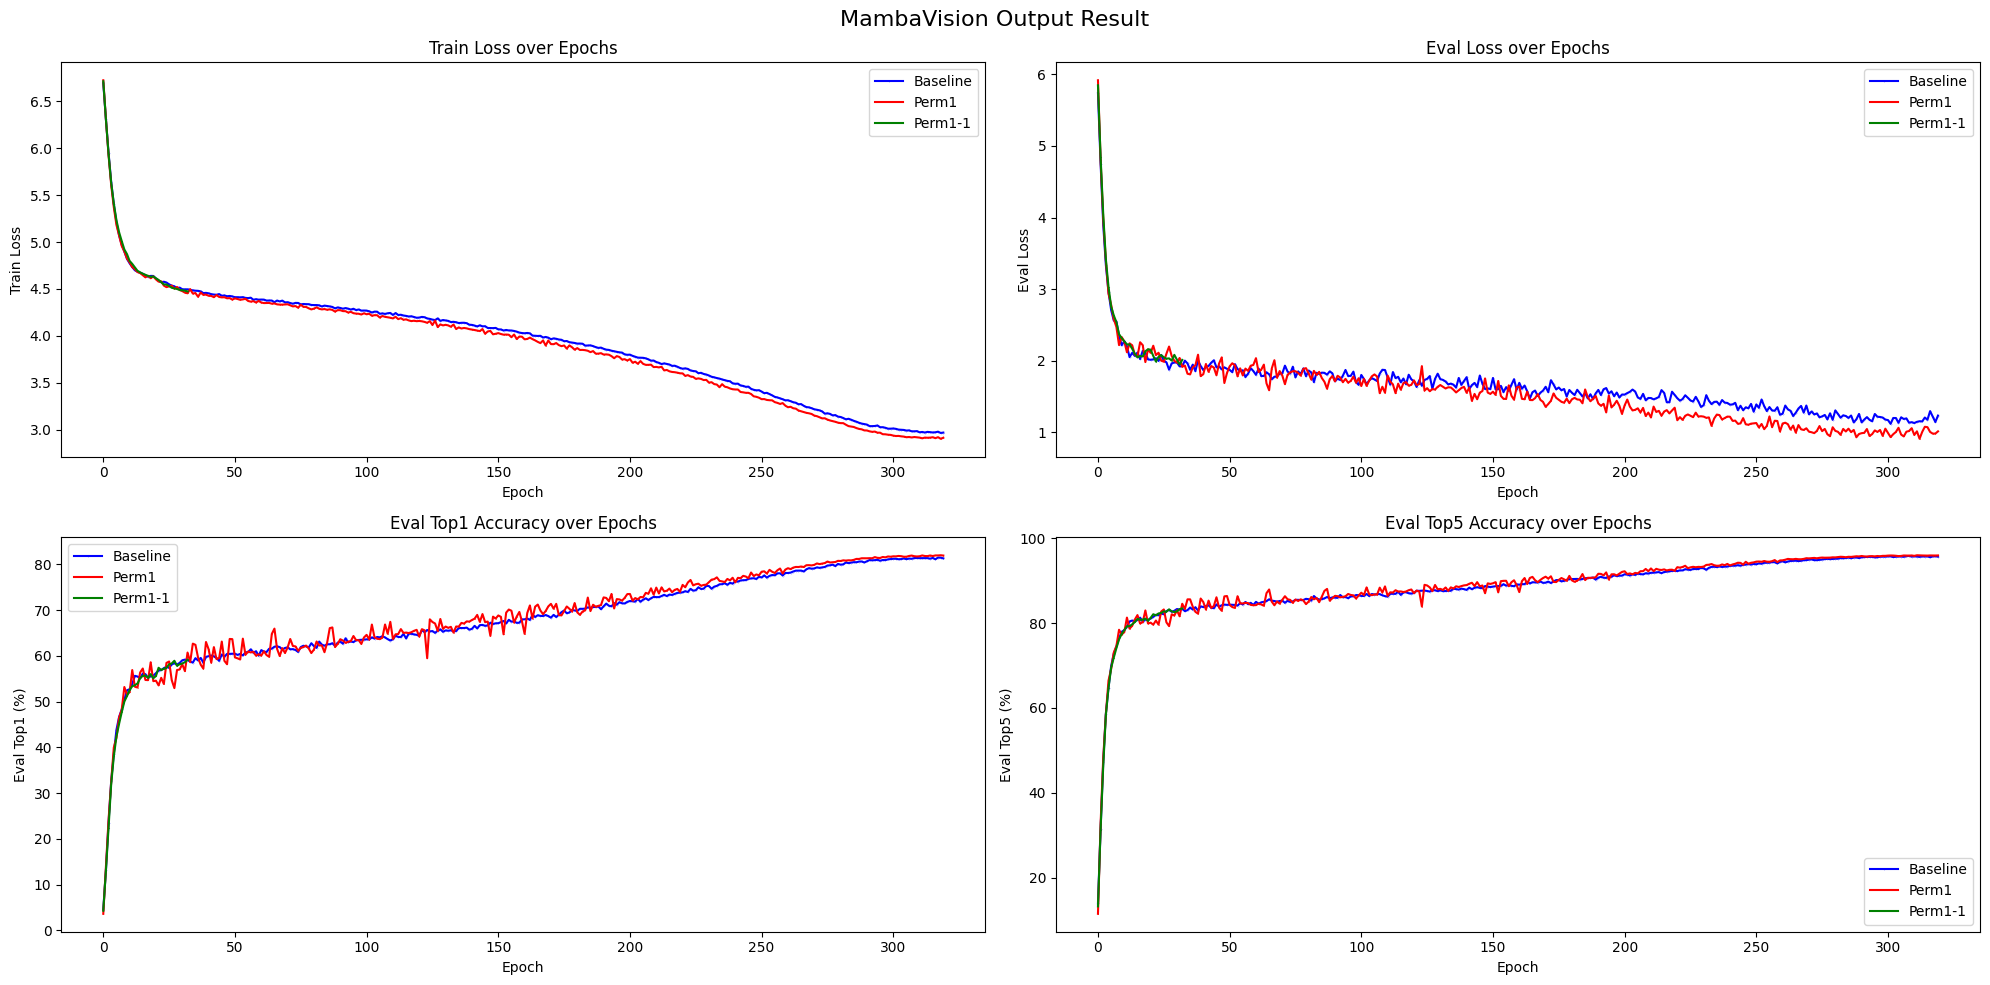

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

# Read data from the text files
df_baseline = pd.read_csv('./summary/original.txt')
df_perm1 = pd.read_csv('./summary/perm1.txt')
df_perm1_1 = pd.read_csv('./summary/perm1-1.txt')  # Added the new file
df_perm2 = pd.read_csv('./summary/perm2.txt')
df_attn = pd.read_csv('./summary/attn.txt')
df_perm3 = pd.read_csv('./summary/perm3.txt')
df_perm4 = pd.read_csv('./summary/perm4.txt')
df_attn3 = pd.read_csv('./summary/attn3.txt')
df_attn4 = pd.read_csv('./summary/attn4.txt')

# Plotting
plt.figure(figsize=(20, 10))

# Add a suptitle for the entire figure
plt.suptitle('MambaVision Output Result', fontsize=16)

# Train Loss Comparison
plt.subplot(2, 2, 1)
plt.plot(df_baseline['epoch'], df_baseline['train_loss'], marker='o', label='Baseline', color='blue', markersize=0.1)
plt.plot(df_perm1['epoch'], df_perm1['train_loss'], marker='x', label='Perm1', color='red', markersize=0.1)
plt.plot(df_perm1_1['epoch'], df_perm1_1['train_loss'], marker='*', label='Perm1-1', color='green', markersize=0.1)  # Added Perm1-1
# plt.plot(df_perm3['epoch'], df_perm3['train_loss'], marker='^', label='Perm3', color='orange', markersize=0.1)
# plt.plot(df_perm4['epoch'], df_perm4['train_loss'], marker='v', label='Perm4', color='purple', markersize=0.1)
plt.title('Train Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Train Loss')
plt.legend()

# Eval Loss Comparison
plt.subplot(2, 2, 2)
plt.plot(df_baseline['epoch'], df_baseline['eval_loss'], marker='o', label='Baseline', color='blue', markersize=0.1)
plt.plot(df_perm1['epoch'], df_perm1['eval_loss'], marker='x', label='Perm1', color='red', markersize=0.1)
plt.plot(df_perm1_1['epoch'], df_perm1_1['eval_loss'], marker='*', label='Perm1-1', color='green', markersize=0.1)  # Added Perm1-1
# plt.plot(df_perm3['epoch'], df_perm3['eval_loss'], marker='^', label='Perm3', color='orange', markersize=0.1)
# plt.plot(df_perm4['epoch'], df_perm4['eval_loss'], marker='v', label='Perm4', color='purple', markersize=0.1)
plt.title('Eval Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Eval Loss')
plt.legend()

# Eval Top1 Accuracy Comparison
plt.subplot(2, 2, 3)
plt.plot(df_baseline['epoch'], df_baseline['eval_top1'], marker='o', label='Baseline', color='blue', markersize=0.1)
plt.plot(df_perm1['epoch'], df_perm1['eval_top1'], marker='x', label='Perm1', color='red', markersize=0.1)
plt.plot(df_perm1_1['epoch'], df_perm1_1['eval_top1'], marker='*', label='Perm1-1', color='green', markersize=0.1)  # Added Perm1-1
# plt.plot(df_perm3['epoch'], df_perm3['eval_top1'], marker='^', label='Perm3', color='orange', markersize=0.1)
# plt.plot(df_perm4['epoch'], df_perm4['eval_top1'], marker='v', label='Perm4', color='purple', markersize=0.1)
plt.title('Eval Top1 Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Eval Top1 (%)')
plt.legend()

# Eval Top5 Accuracy Comparison
plt.subplot(2, 2, 4)
plt.plot(df_baseline['epoch'], df_baseline['eval_top5'], marker='o', label='Baseline', color='blue', markersize=0.1)
plt.plot(df_perm1['epoch'], df_perm1['eval_top5'], marker='x', label='Perm1', color='red', markersize=0.1)
plt.plot(df_perm1_1['epoch'], df_perm1_1['eval_top5'], marker='*', label='Perm1-1', color='green', markersize=0.1)  # Added Perm1-1
# plt.plot(df_perm3['epoch'], df_perm3['eval_top5'], marker='^', label='Perm3', color='orange', markersize=0.1)
# plt.plot(df_perm4['epoch'], df_perm4['eval_top5'], marker='v', label='Perm4', color='purple', markersize=0.1)
plt.title('Eval Top5 Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Eval Top5 (%)')
plt.legend()

plt.tight_layout()

# Save the plot to a file
plt.savefig('./output_perm.png')


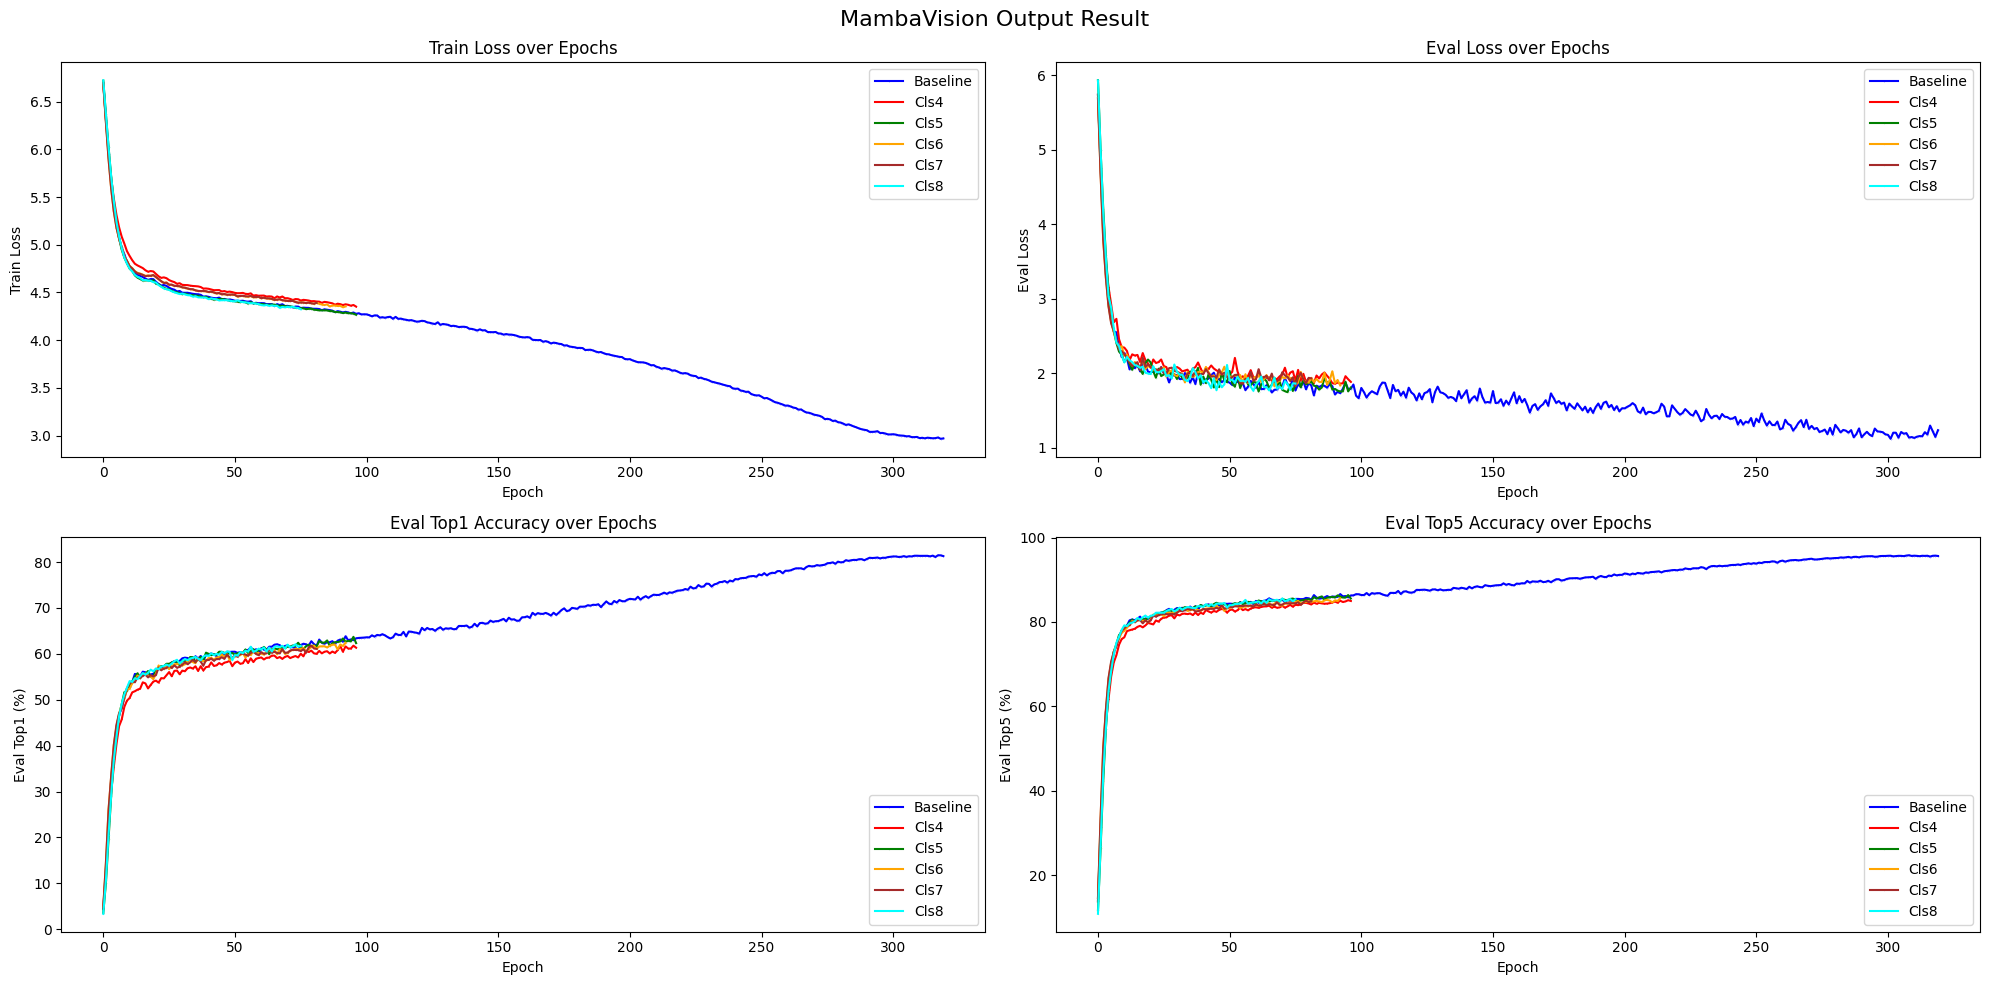

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

# Read data from the text files
df_baseline = pd.read_csv('./summary/original.txt')
df_cls4 = pd.read_csv('./summary/cls4.txt')
df_cls5 = pd.read_csv('./summary/cls5.txt')
df_cls6 = pd.read_csv('./summary/cls6.txt')
df_cls7 = pd.read_csv('./summary/cls7.txt')
df_cls8 = pd.read_csv('./summary/cls8.txt')

# Plotting
plt.figure(figsize=(20, 10))

# Add a suptitle for the entire figure
plt.suptitle('MambaVision Output Result', fontsize=16)

# Train Loss Comparison
plt.subplot(2, 2, 1)
plt.plot(df_baseline['epoch'], df_baseline['train_loss'], marker='o', label='Baseline', color='blue', markersize=0.1)
plt.plot(df_cls4['epoch'], df_cls4['train_loss'], marker='x', label='Cls4', color='red', markersize=0.1)
# plt.plot(df_perm2['epoch'], df_perm2['train_loss'], marker='s', label='Perm2', color='grey', markersize=0.1)
plt.plot(df_cls5['epoch'], df_cls5['train_loss'], marker='.', label='Cls5', color='green', markersize=0.1)
plt.plot(df_cls6['epoch'], df_cls6['train_loss'], marker='^', label='Cls6', color='orange', markersize=0.1)
# plt.plot(df_attn2['epoch'], df_attn2['train_loss'], marker='v', label='Attn2', color='purple', markersize=0.1)
plt.plot(df_cls7['epoch'], df_cls7['train_loss'], marker='>', label='Cls7', color='brown', markersize=0.1)
plt.plot(df_cls8['epoch'], df_cls8['train_loss'], marker='<', label='Cls8', color='cyan', markersize=0.1)
plt.title('Train Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Train Loss')
plt.legend()

# Eval Loss Comparison
plt.subplot(2, 2, 2)
plt.plot(df_baseline['epoch'], df_baseline['eval_loss'], marker='o', label='Baseline', color='blue', markersize=0.1)
plt.plot(df_cls4['epoch'], df_cls4['eval_loss'], marker='x', label='Cls4', color='red', markersize=0.1)
# plt.plot(df_perm2['epoch'], df_perm2['eval_loss'], marker='s', label='Perm2', color='grey', markersize=0.1)
plt.plot(df_cls5['epoch'], df_cls5['eval_loss'], marker='.', label='Cls5', color='green', markersize=0.1)
plt.plot(df_cls6['epoch'], df_cls6['eval_loss'], marker='^', label='Cls6', color='orange', markersize=0.1)
# plt.plot(df_attn2['epoch'], df_attn2['eval_loss'], marker='v', label='Attn2', color='purple', markersize=0.1)
plt.plot(df_cls7['epoch'], df_cls7['eval_loss'], marker='>', label='Cls7', color='brown', markersize=0.1)
plt.plot(df_cls8['epoch'], df_cls8['eval_loss'], marker='<', label='Cls8', color='cyan', markersize=0.1)
plt.title('Eval Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Eval Loss')
plt.legend()

# Eval Top1 Accuracy Comparison
plt.subplot(2, 2, 3)
plt.plot(df_baseline['epoch'], df_baseline['eval_top1'], marker='o', label='Baseline', color='blue', markersize=0.1)
plt.plot(df_cls4['epoch'], df_cls4['eval_top1'], marker='x', label='Cls4', color='red', markersize=0.1)
# plt.plot(df_perm2['epoch'], df_perm2['eval_top1'], marker='s', label='Perm2', color='grey', markersize=0.1)
plt.plot(df_cls5['epoch'], df_cls5['eval_top1'], marker='.', label='Cls5', color='green', markersize=0.1)
plt.plot(df_cls6['epoch'], df_cls6['eval_top1'], marker='^', label='Cls6', color='orange', markersize=0.1)
# plt.plot(df_attn2['epoch'], df_attn2['eval_top1'], marker='v', label='Attn2', color='purple', markersize=0.1)
plt.plot(df_cls7['epoch'], df_cls7['eval_top1'], marker='>', label='Cls7', color='brown', markersize=0.1)
plt.plot(df_cls8['epoch'], df_cls8['eval_top1'], marker='<', label='Cls8', color='cyan', markersize=0.1)
plt.title('Eval Top1 Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Eval Top1 (%)')
plt.legend()

# Eval Top5 Accuracy Comparison
plt.subplot(2, 2, 4)
plt.plot(df_baseline['epoch'], df_baseline['eval_top5'], marker='o', label='Baseline', color='blue', markersize=0.1)
plt.plot(df_cls4['epoch'], df_cls4['eval_top5'], marker='x', label='Cls4', color='red', markersize=0.1)
# plt.plot(df_perm2['epoch'], df_perm2['eval_top5'], marker='s', label='Perm2', color='grey', markersize=0.1)
plt.plot(df_cls5['epoch'], df_cls5['eval_top5'], marker='.', label='Cls5', color='green', markersize=0.1)
plt.plot(df_cls6['epoch'], df_cls6['eval_top5'], marker='^', label='Cls6', color='orange', markersize=0.1)
# plt.plot(df_attn2['epoch'], df_attn2['eval_top5'], marker='v', label='Attn2', color='purple', markersize=0.1)
plt.plot(df_cls7['epoch'], df_cls7['eval_top5'], marker='>', label='Cls7', color='brown', markersize=0.1)
plt.plot(df_cls8['epoch'], df_cls8['eval_top5'], marker='<', label='Cls8', color='cyan', markersize=0.1)
plt.title('Eval Top5 Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Eval Top5 (%)')
plt.legend()

plt.tight_layout()

# Save the plot to a file
plt.savefig('./output_cls.png')
